P(A) 사전확률 - 암 P(B) 사후확률 - 양성

P(A|B) -> P(B|A)?

베이즈의 정리 P(A|B) = P(B|A) * P(A) / P(B)

문제) 양성B 진단 -> 실제 암A일 확률은?, 진단의 정확도 95%, 암환자의 비율 10%

5% 오진 P(양성|암') = 0.05 = P(B|A')
95% 정확 P(양성|암) = 0.95 = P(B|A)
암 P(A) = 0.1 암' P(A') = 0.9

양성 P(B) = 암&양성 + 암'&양성 = 0.095 + 0.045 = 0.14 암&양성 = P(A교집합B) = P(A)P(B|A) = 0.10.95 암'&양성 = P(A'교집합B) = P(A') * P(B|A') = 0.9*0.05

In [1]:
P_A = 0.1 # 암의 확률
P_not_A = 1 - P_A # 암이 아닐 확률
P_B_given_A = 0.95 # 양성판정의 정확도
P_B_given_not_A = 0.05 # 암이 아닌데, 양성 판정이 나온 확률

# 베이즈의 정리
P_A_given_B = P_B_given_A * P_A / ((P_B_given_A*P_A)+(P_B_given_not_A*P_not_A))
P_A_given_B


0.6785714285714285

# 확률의 계산

In [3]:
# 동전던지기
space = ['앞면', '뒷면']
event = ['앞면']

prob = lambda event, space: len(event) /len(space)
prob(event, space)

0.5

In [5]:
# 주사위 던지기
# 1번 던져 3이 나올 확률
space = [1,2,3,4,5,6]
event = [3]

prob(event, space)

0.16666666666666666

# 확률의 덧셈

## 주사위에서 짝수이거나 5보다 큰 수가 나올 확률

In [6]:
space = {1,2,3,4,5,6}
event_A = {2,4,6}
event_B = {5,6}

In [7]:
합집합 = event_A | event_B
합집합

{2, 4, 5, 6}

In [12]:
합집합의갯수 = len(합집합)
전체경우의수 = len(space)
확률_1 = 합집합의갯수 / 전체경우의수
확률_1#짝수 또는 4보다 큰 눈이 나올 확률

0.6666666666666666

# 2이하이거나 5이상인 눈이 나올 확률

In [17]:
space = {1,2,3,4,5,6}
event_C = {1,2}
event_D = {5,6}
union_C_D = event_C | event_D

In [18]:
합집합의갯수 = len(union_C_D)
전체경우의수 = len(space)
확률_2 = 합집합의갯수 / 전체경우의수
확률_2

0.6666666666666666

# 확률의 교집합

In [ ]:
주사위를 던져 짝수 & 2인 확률

In [20]:
# 조건부 확률
sample_space = [1,2,3,4,5,6]
event_A = [2,4,6]
event_B = [2]
P_A = len(event_A)/len(sample_space) # A일 확률
P_B = len(event_B)/len(sample_space) # B일 확률
P_B_and_P_A_ele = set(event_A) & set(event_B) # 교집합의 원소
P_B_and_P_A_ele

{2}

In [21]:
P_B_and_A = len(P_B_and_P_A_ele)/len(sample_space) # 교집합이 나올 확률
P_B_and_A

0.16666666666666666

In [23]:
# 조건부확률: 짝수일때 2가 나올 확률
# P(B|A) = P(B_and_A) / P_A
P_B_given_A = P_B_and_A / P_A
P_B_given_A

0.3333333333333333

# 우도와 확률값

동전 10번 던지고, 8번 앞면이 나왔다.
우도의 계산

In [24]:
from scipy.stats import binom

In [26]:
n = 10
k = 8 # 앞면의 횟수

# 가설 1 - 공정한 동전일 것이다
p1 = 0.5 # 앞면이 나올 확률 - 공정할 경우
p1_likehood = binom.pmf(k, n, p1) # 조건, 총사건, 확률

p2 = 0.8
p2_likehood = binom.pmf(k, n, p2)

p1_likehood, p2_likehood

(np.float64(0.04394531250000005), np.float64(0.30198988799999993))

가설1의 경우, 앞면이 8번 나올 확률은 4.4%
가설2의 경우, 앞면이 8번 나올 확률은 30.2%

앞면 8번 나오는 관측값은 p=0.8인 모델이 더 잘 설명한다.(우도가 크다)

# 기대값
x의 확률들의 평균

In [28]:
x_values = [1,2,3]
p_x = [1/6, 3/6, 2/6]

exp_value = 0
# 기대값
for i in range(len(x_values)):
    exp_value += x_values[i] * p_x[i]
    
print(f'기대값: {exp_value:.5f}')

기대값: 2.16667


In [34]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

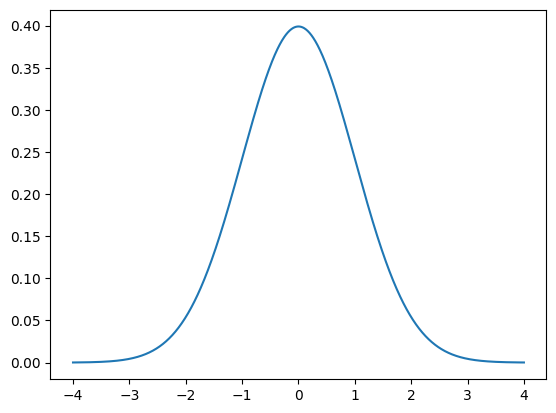

In [36]:
mu = 0
sigma = 1

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x,loc=mu, scale = sigma)
plt.plot(x,y)
plt.show()

# 표집분포

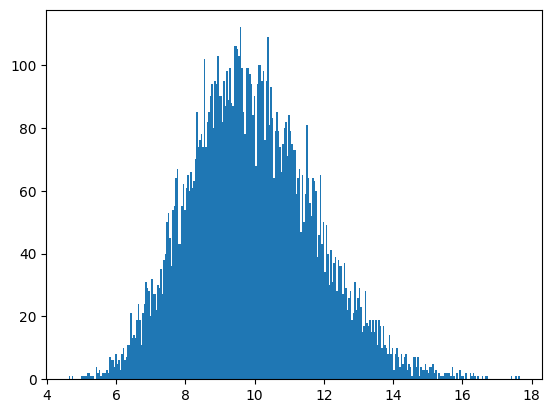

In [43]:
np.random.seed(0)
X_pop = np.random.exponential(scale=10, size=10000)
sample_mean = [np.mean(np.random.choice(X_pop, size=30))
               for _ in range(10000)]
plt.hist(sample_mean, bins=300)
plt.show()

# z점수

In [44]:
mu = 100
sigma = 10

x1 = 110 # z점수를 계산하려고 하는 원래 점수
x2 = 125

# z점수 = 원점수 - 평균 / 표준편차
z_x1 = (x1 - mu)/sigma
z_x2  = (x2 - mu)/sigma
z_x1, z_x2

(1.0, 2.5)

z_x1 = 0.8413 -> 0.5 -> 0.3413
z_x2 = 0.9938 -> 0.5 -> 0.4938

0.4938 - 0.3413 = 0.1525 15%

전체 분포에서 x1~x2 사이의 면적

In [47]:
area_z_x1 = norm.cdf(z_x1) - norm.cdf(0)
area_z_x2 = norm.cdf(z_x2) - norm.cdf(0)
diff_area = area_z_x2 - area_z_x1
diff_area

np.float64(0.15244558860568092)

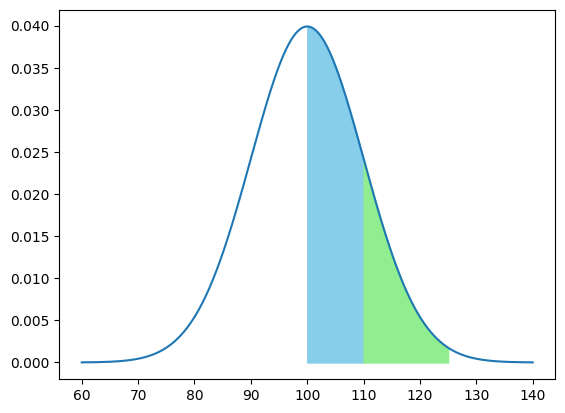

In [53]:
# 시각화
x = np.linspace(mu-4*sigma, mu+4*sigma, 10000)
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)
plt.fill_between(x,y,where=(x>100)&(x<=110), color='skyblue')
plt.fill_between(x,y,where=(x>110)&(x<=125), color='lightgreen')
plt.show()

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False